# Классификация текстов

 - https://github.com/koroteevmv/ML_course/tree/main/ML2.3_text
 - https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
 - https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

1. Загрузите датасет 20 newsgroups;

In [1]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.

In [5]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [9]:
print(news['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

3. Выведите информацию о количественных параметрах датасета;


In [10]:
len(news.data)

18846

In [11]:
len(news.filenames)

18846

In [13]:
len(news.target)

18846

In [12]:
news["target_names"]

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

4. Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);


In [21]:
import random

selected_numbers = random.sample(range(0, len(news.data)), 1)

selected_data = [ news.data[num] for num in selected_numbers ]
selected_target = [ news.target[num] for num in selected_numbers ]

print(selected_data[0], '-'*30 ,selected_target)

From: cdt@sw.stratus.com (C. D. Tavares)
Subject: Re: Photographers removed from compound
Organization: Stratus Computer, Inc.
Lines: 41
Distribution: na
NNTP-Posting-Host: rocket.sw.stratus.com

In article <C5wJFz.Bus@news.udel.edu>, roby@chopin.udel.edu (Scott W Roby) writes:
> >> I find this disturbing. 

> >Good.  Keep thinking critically.

> Dont' patronize me and I won't patronize you.

Feel free to patronize me all you like; I need the tips. :-)
Seriously, if you were insulted, I apologize.

> The most tiresome thing about this group is that so many people 
> tell others they are sucking up to the government when ever they 
> decide that something the government says is plausible and praise 
> them as independent thinkers whenever they find something the government 
> says implausible.

People are sucking up to the government when they decide that ONLY the
things the government says are plausible.  Especially if they refuse to
consider reasonable alternatives.

However, from wha

5. Разделите эти данные на тестовую и обучающую выборки;

In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

news_train = fetch_20newsgroups(subset='train')
vectors_train = vectorizer.fit_transform(news_train.data)

news_test = fetch_20newsgroups(subset='test')
vectors_test = vectorizer.transform(news_test.data)

In [17]:
vectors_train.shape

(11314, 130107)

In [18]:
vectors_test.shape

(7532, 130107)

6. Постройте модель наивного байесовского для классификации текстов;

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

In [42]:
%%time
clf = MultinomialNB(alpha=0.3)
clf.fit(vectors_train, news_train.target)

Wall time: 138 ms


MultinomialNB(alpha=0.3)

7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
   - достоверность предсказания (accuracy);
   - точность (precision);
   - полнота (recall);

In [43]:
pred = clf.predict(vectors_test)
y_true = news_test.target
print(classification_report(y_true, pred, target_names=news_train.target_names))
print(clf.score(vectors_test, y_true))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.82      0.81       319
           comp.graphics       0.60      0.81      0.69       389
 comp.os.ms-windows.misc       0.33      0.01      0.01       394
comp.sys.ibm.pc.hardware       0.54      0.78      0.64       392
   comp.sys.mac.hardware       0.77      0.83      0.80       385
          comp.windows.x       0.76      0.77      0.77       395
            misc.forsale       0.87      0.78      0.82       390
               rec.autos       0.86      0.93      0.89       396
         rec.motorcycles       0.94      0.95      0.95       398
      rec.sport.baseball       0.96      0.92      0.94       397
        rec.sport.hockey       0.95      0.96      0.96       399
               sci.crypt       0.86      0.94      0.90       396
         sci.electronics       0.77      0.75      0.76       393
                 sci.med       0.89      0.84      0.87       396
         

8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [44]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [45]:
def print_learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), title="Learning Curves MultinomialNB"):
    """
    Функция для вывода прямой обучения learning_curve
    ---------------------------------------
    > model - переменная модели из библиотеки sklearn
    > x_train - матрица признаков
    > y_train - матрица правильных ответов
    > train_sizes - относительное или абсолютное количество обучающих примеров
    > model_label - тип модели (отрисовывается на графике)
    """
    from sklearn.model_selection import learning_curve
    _, train_scores, test_scores, fit_times, _ = learning_curve(model, x_train, y_train, train_sizes=train_sizes, cv=5, 
                                                  n_jobs=-1, return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    _, axes = plt.subplots(1, figsize=(10, 5))
    
    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    
    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

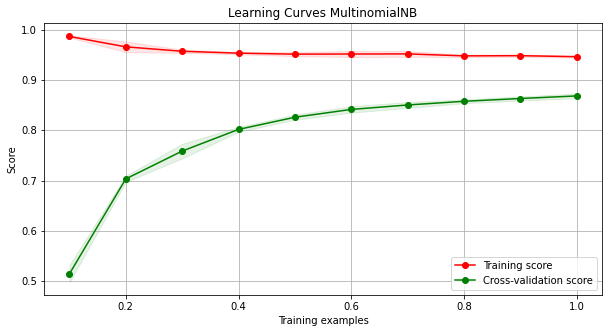

In [46]:
print_learning_curve(clf, vectors_train, news_train.target)

9. Сделайте вывод о применимости модели.

Данная модель имеет хорошую общую достовреность, однако один из классов модель плохо определяет. Скорее всего это связано с тем что данных по данному классу *comp.os.ms-windows.misc* в обучающей выборке мало. 